C:\Users\Carlo Alberto\AppData\Local\Temp\ipykernel_5244\379393485.py:7: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


Number of samples: 2260668
Number of numerical features: 113
Number of categorical features: 38

Loan Amount Distribution Summary:
count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

Loan Amount by Grade Summary:
          count          mean          std     min       25%      50%  \
grade                                                                   
A      433027.0  14603.343210  9107.975657   500.0   8000.00  12000.0   
B      663557.0  14173.338199  8957.012601   500.0   7400.00  12000.0   
C      650053.0  15038.083318  9203.950054   500.0   8000.00  13000.0   
D      324424.0  15711.983007  9250.612823   500.0   8575.00  14400.0   
E      135639.0  17453.078392  9363.276694   600.0  10000.00  16000.0   
F       41800.0  19124.646531  9166.366254  1000.0  12000.00  18175.0   
G       12168.0  20383.988741  8994.472986   6

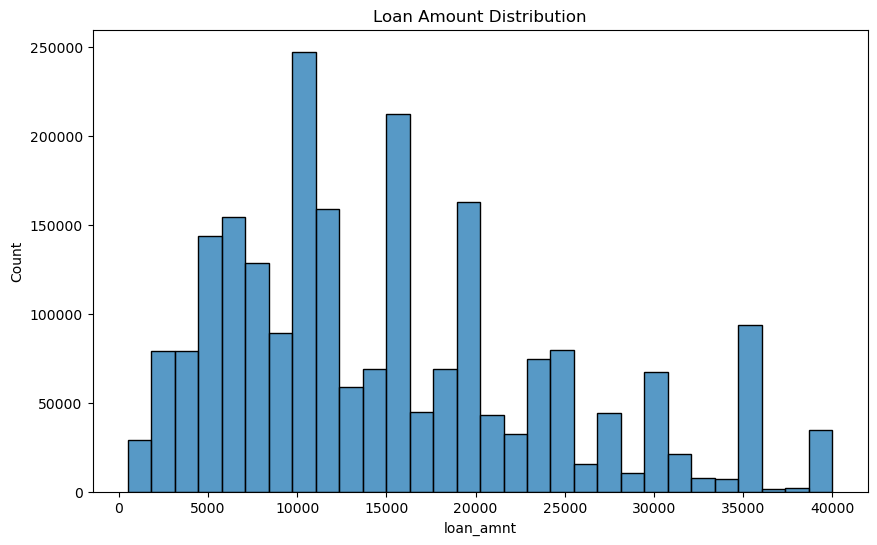

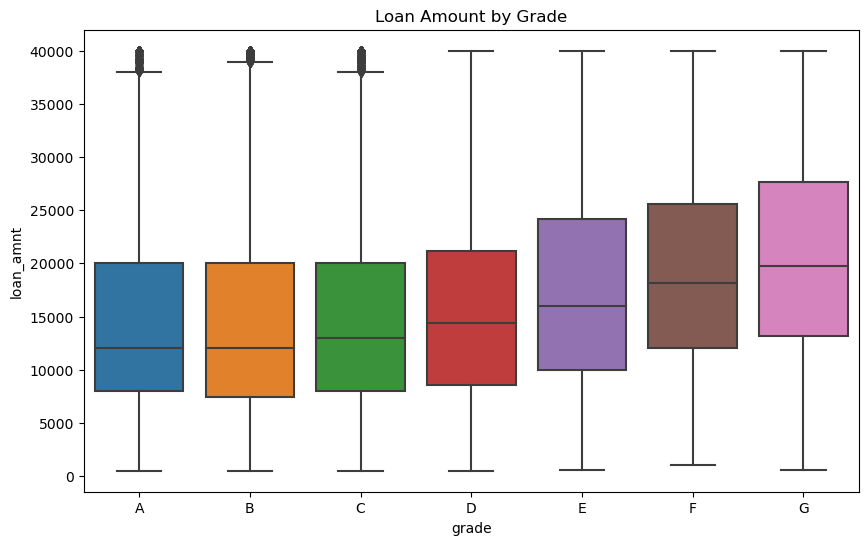

C:\Users\Carlo Alberto\AppData\Local\Temp\ipykernel_5244\379393485.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


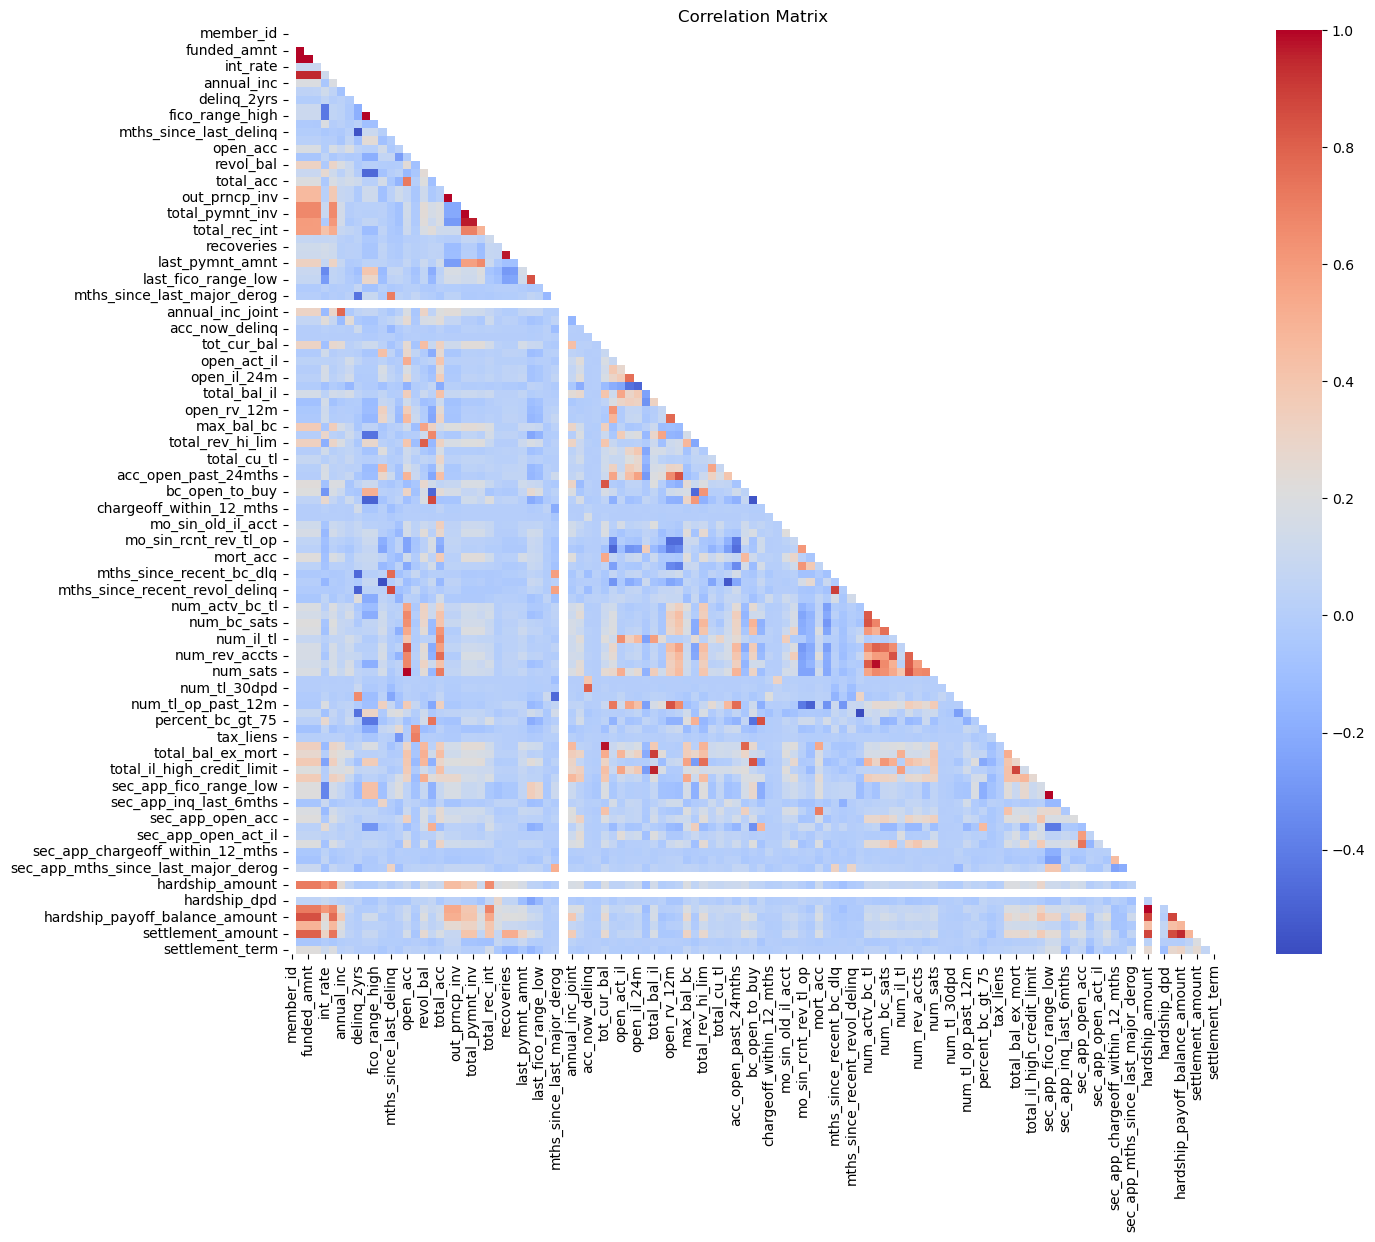

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

# Drop rows with missing grade
df = df.dropna(subset=['grade'])

# Get the number of samples, numerical features, and categorical features
num_samples = len(df)
num_numerical_features = df.select_dtypes(include=[np.number]).shape[1]
num_categorical_features = df.select_dtypes(include=['object']).shape[1]

print(f"Number of samples: {num_samples}")
print(f"Number of numerical features: {num_numerical_features}")
print(f"Number of categorical features: {num_categorical_features}")

# Loan Amount Distribution summary
loan_amnt_summary = df['loan_amnt'].describe()
print("\nLoan Amount Distribution Summary:")
print(loan_amnt_summary)

# Loan Amount by Grade summary
loan_amnt_by_grade_summary = df.groupby('grade')['loan_amnt'].describe()
print("\nLoan Amount by Grade Summary:")
print(loan_amnt_by_grade_summary)

# Plot the distribution of the loan amounts
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'], kde=False, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

# Sort 'grade' column in alphabetical order
order = sorted(df['grade'].unique())

# Create a box plot to see the distribution of loan amounts by loan grade
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='loan_amnt', data=df, order=order)
plt.title('Loan Amount by Grade')
plt.show()

# Display the correlation between the numerical columns
corr = df.corr()

# Mask to remove redundancy from the heatmap.
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, mask=mask)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.yticks(rotation=0)   # Make sure y-axis labels are horizontal
plt.title('Correlation Matrix')
plt.show()


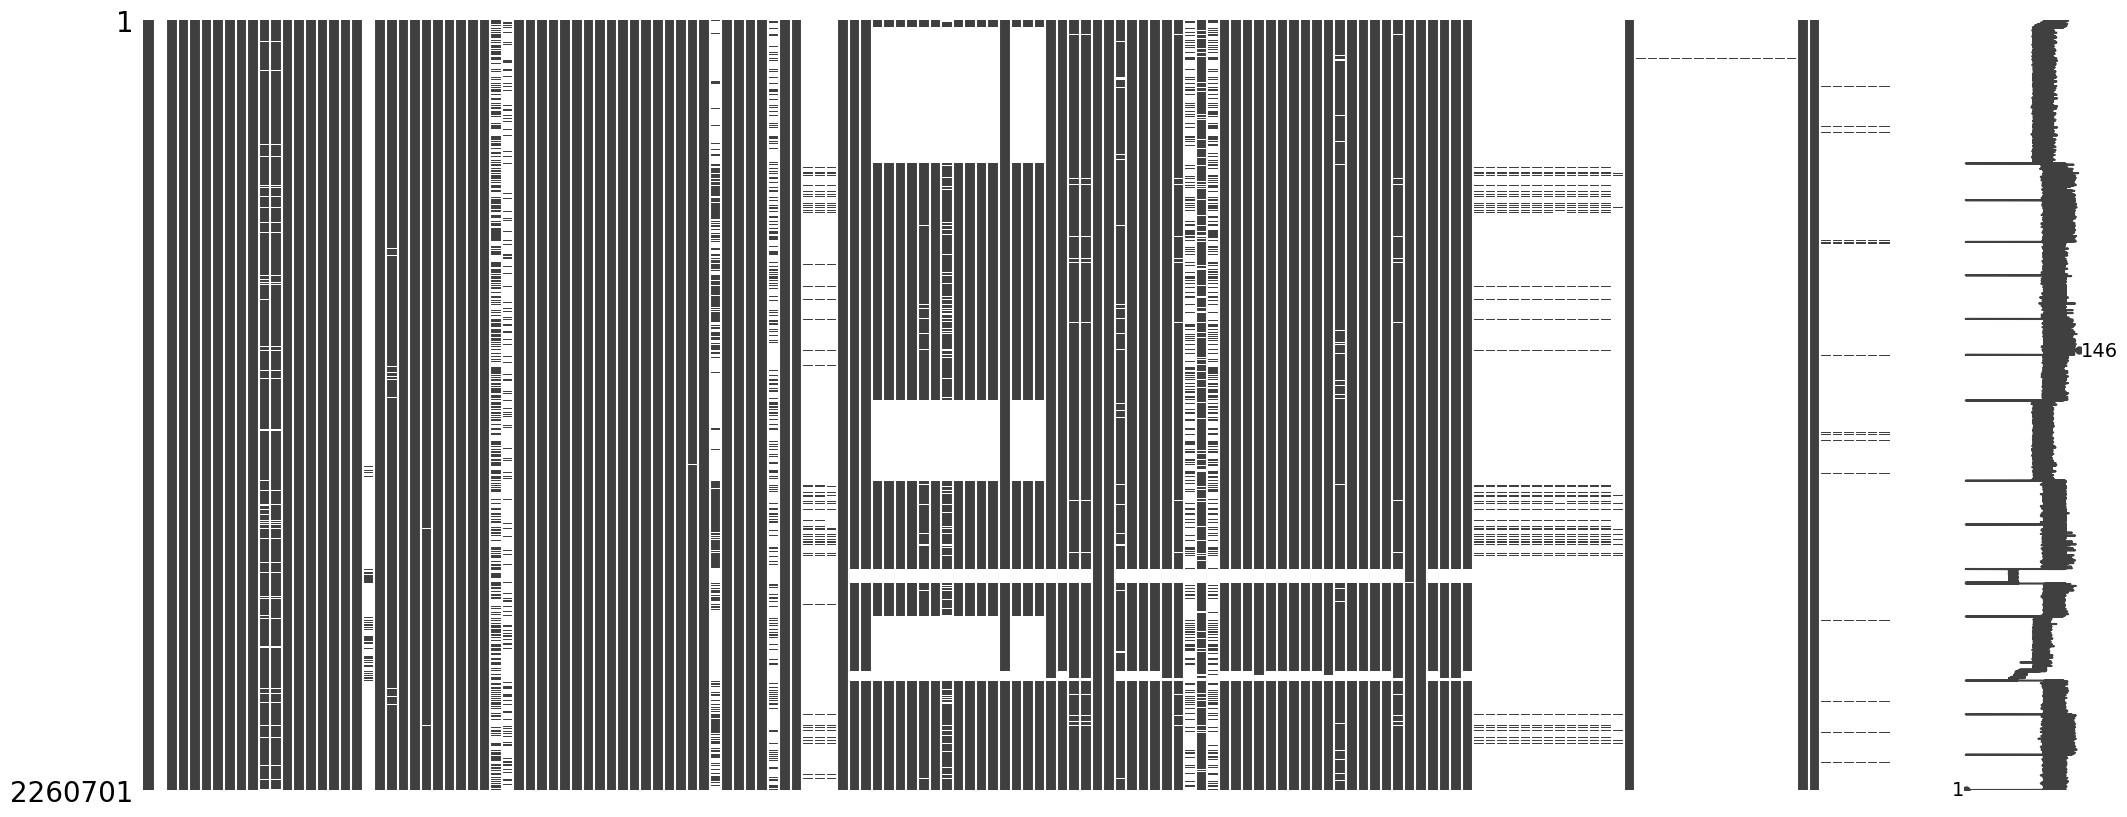

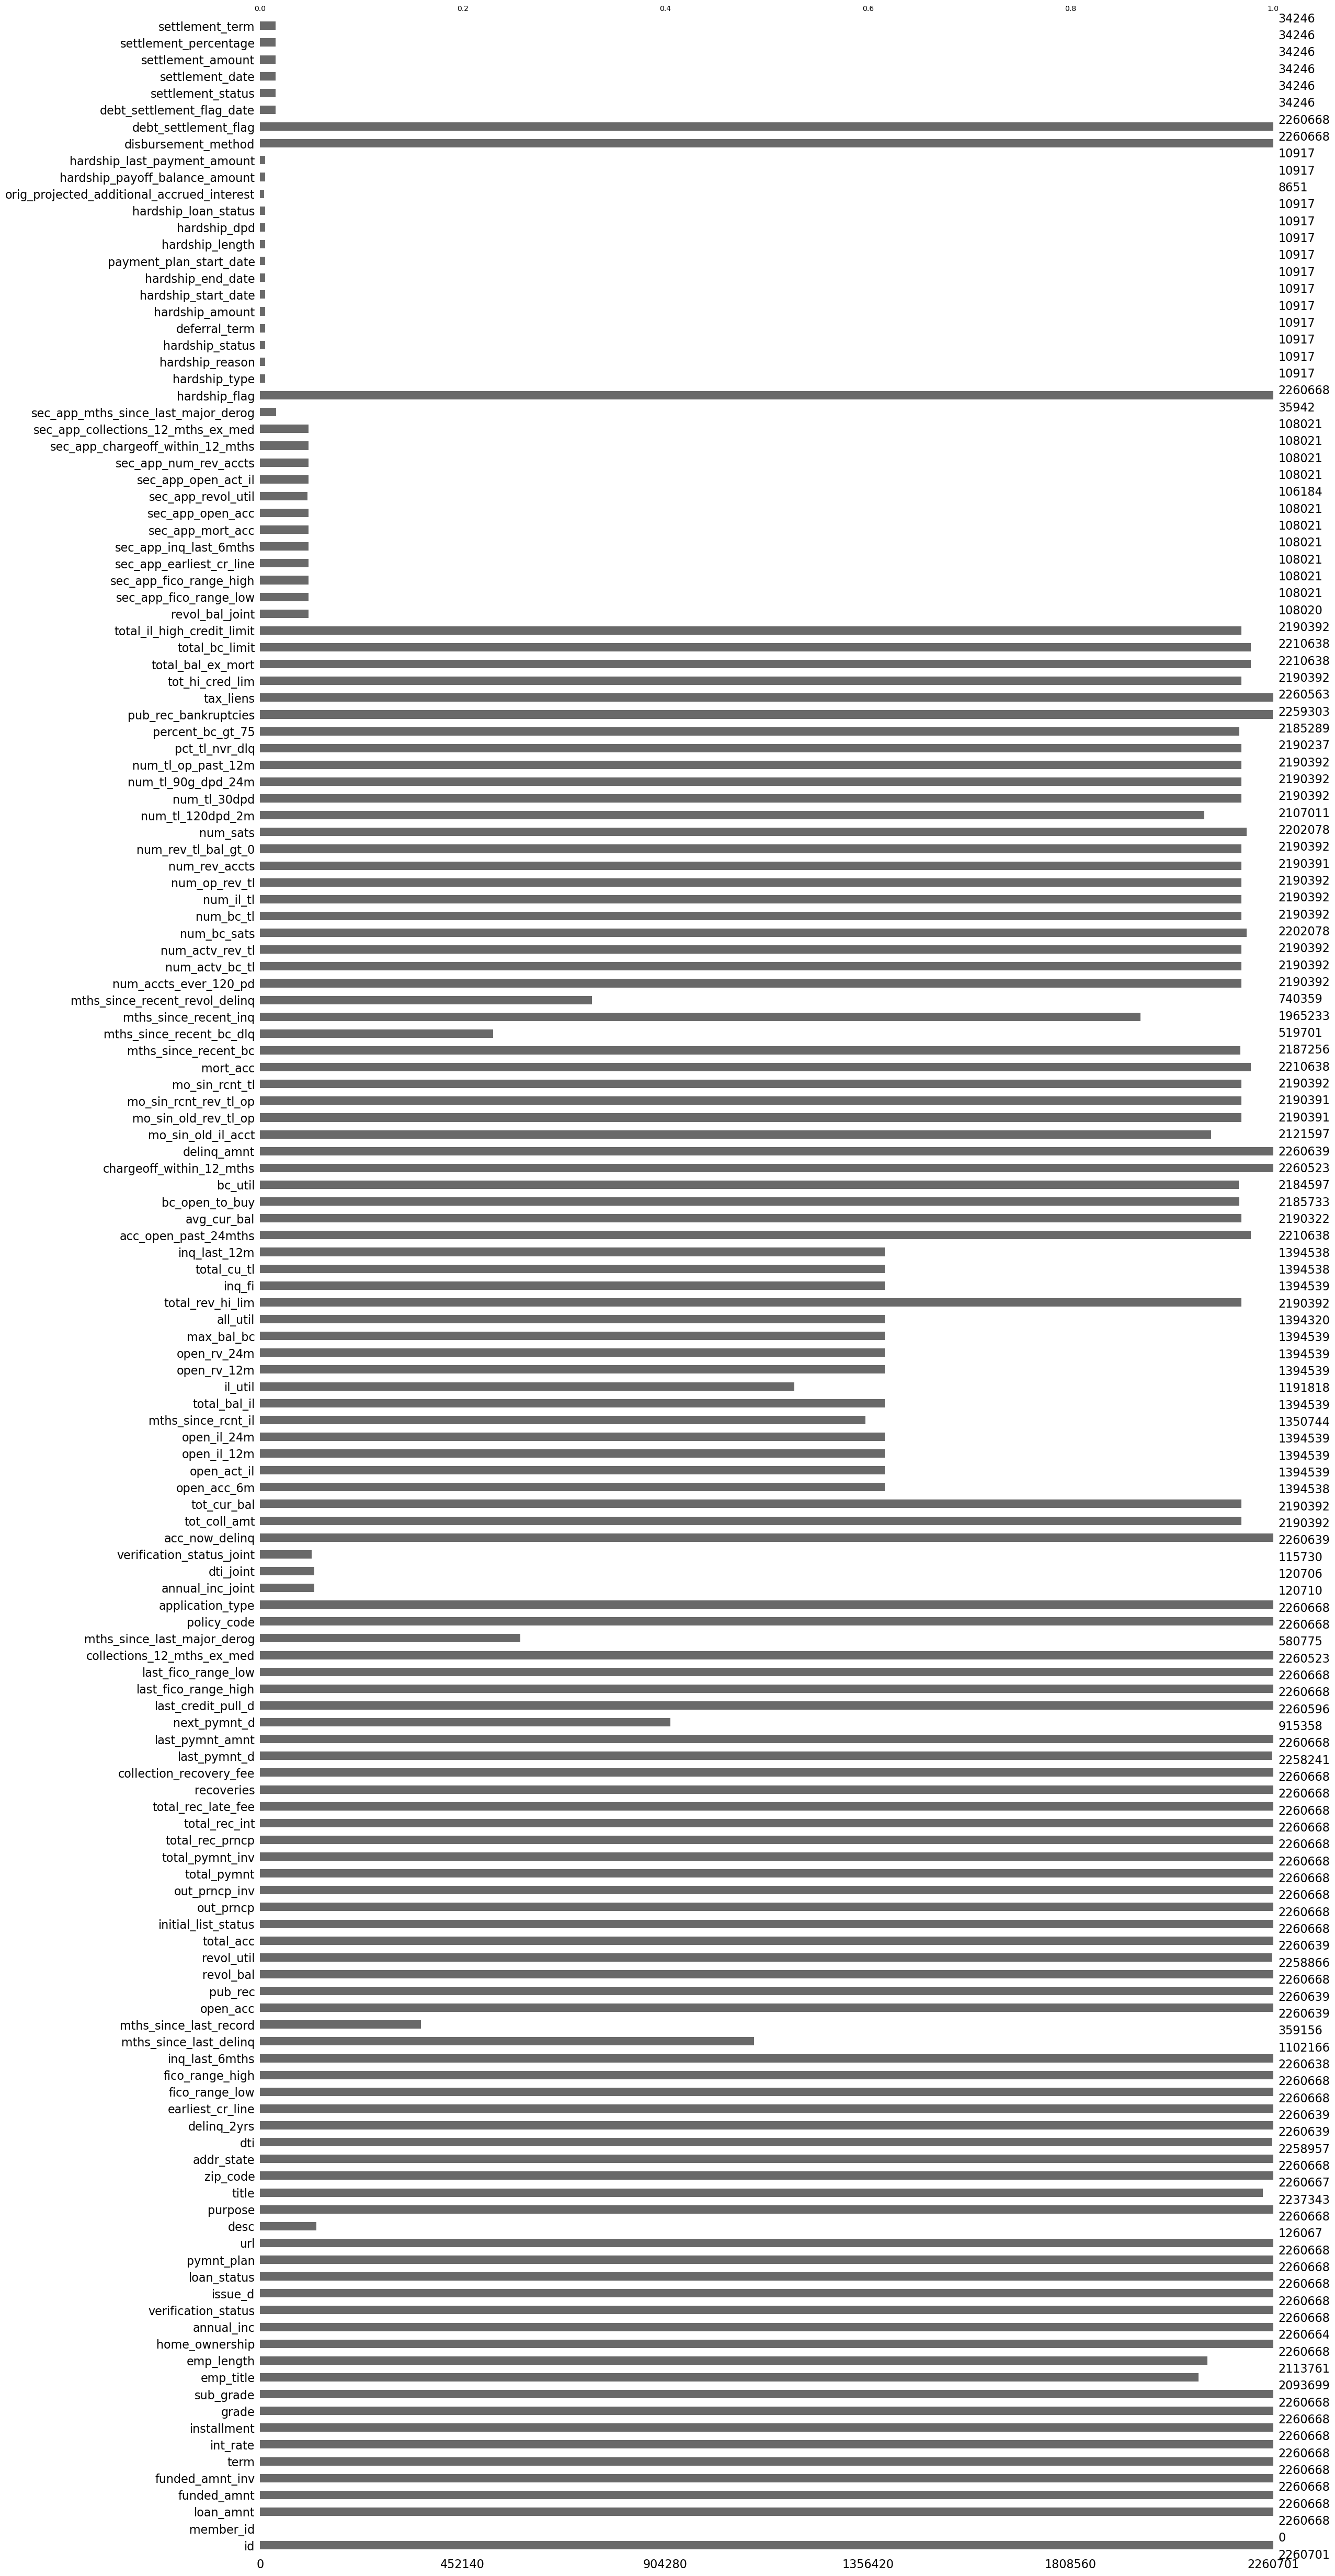

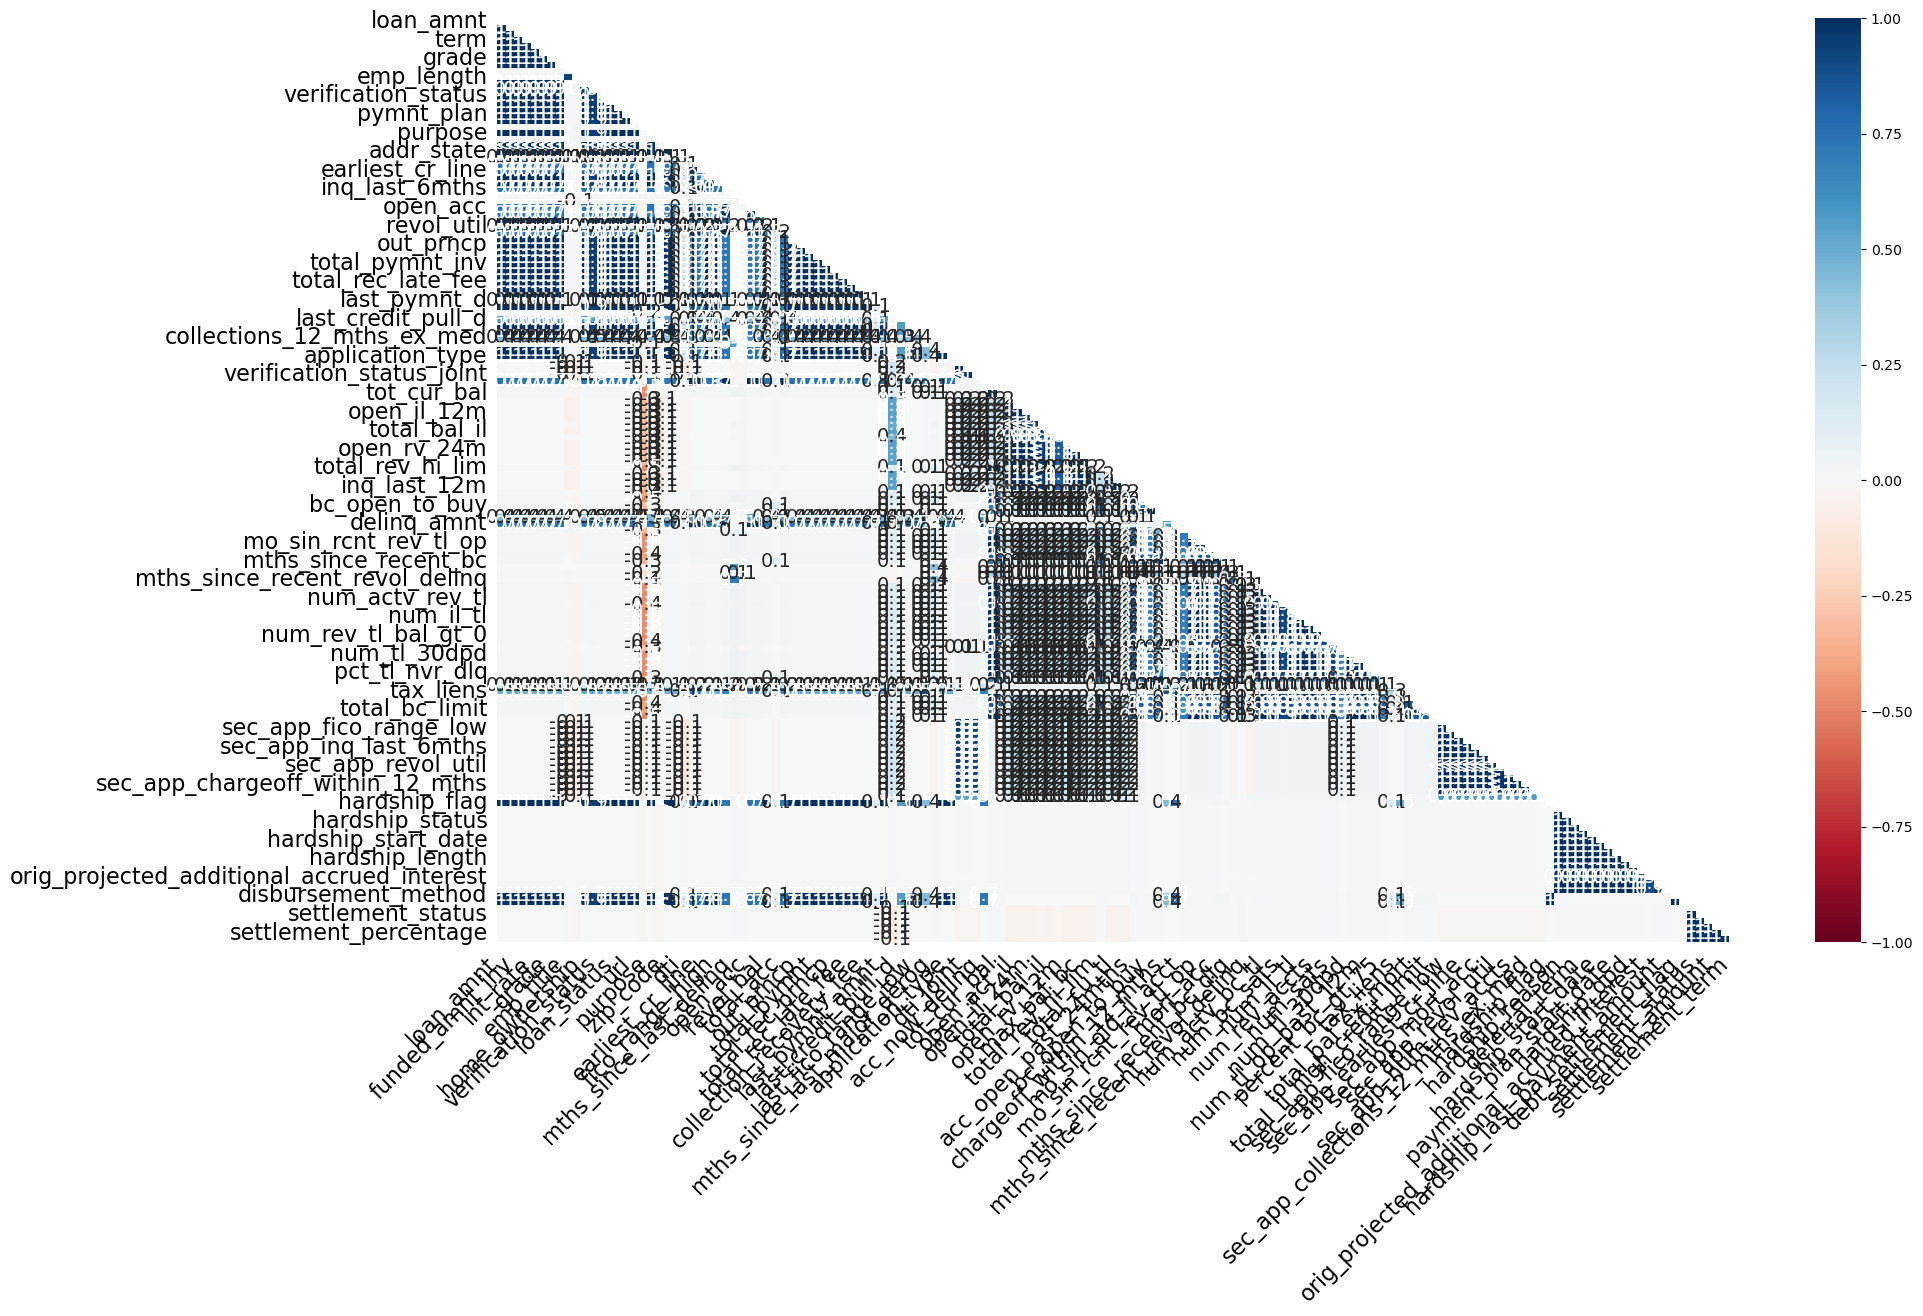

In [2]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df)
plt.show()



In [8]:
# Calculate the overall percentage of missing values
missing_percent = df.isnull().sum().sum() / np.product(df.shape) * 100

# Print the result
print(f"Overall percentage of missing values: {missing_percent}%")


Overall percentage of missing values: 31.779067013621493%
